Sample oil price data:                             date              event      price
0  Sun, 01 Jan 2023 00:00:00 GMT  Economic Sanction  62.990535
1  Mon, 02 Jan 2023 00:00:00 GMT               None  65.525046
2  Tue, 03 Jan 2023 00:00:00 GMT               None  75.789076
3  Wed, 04 Jan 2023 00:00:00 GMT               None  87.451996
4  Thu, 05 Jan 2023 00:00:00 GMT               None  80.845844


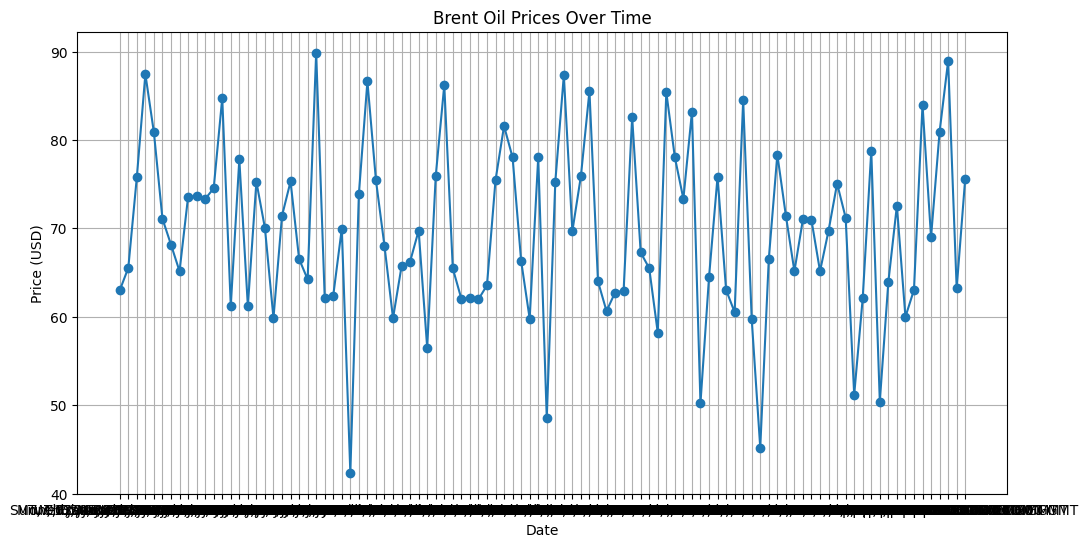

Analysis Metrics: {'MAE': 0.44, 'RMSE': 0.69, 'Volatility': 9.28}


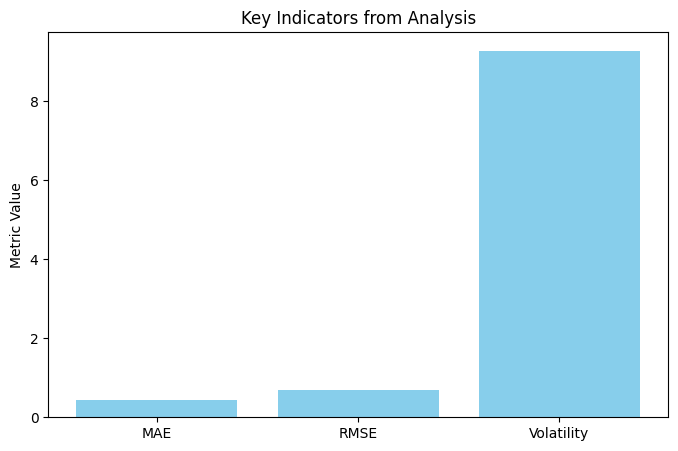

In [1]:
# dashboard_interaction.ipynb
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the base URL of the API
BASE_URL = "http://127.0.0.1:5000/api"

# Function to get Brent oil prices within a date range
def get_oil_prices(start_date=None, end_date=None):
    params = {}
    if start_date:
        params["start_date"] = start_date
    if end_date:
        params["end_date"] = end_date
    response = requests.get(f"{BASE_URL}/oil_prices", params=params)
    data = response.json()
    return pd.DataFrame(data)

# Function to get analysis metrics like RMSE and MAE
def get_metrics():
    response = requests.get(f"{BASE_URL}/metrics")
    return response.json()

# Retrieve oil prices and visualize the data
oil_data = get_oil_prices(start_date="2023-01-01", end_date="2023-04-10")
print("Sample oil price data:", oil_data.head())

# Plot oil prices
plt.figure(figsize=(12, 6))
plt.plot(oil_data["date"], oil_data["price"], marker='o')
plt.title("Brent Oil Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

# Retrieve and print metrics
metrics = get_metrics()
print("Analysis Metrics:", metrics)

# Display key indicators as a bar plot
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.title("Key Indicators from Analysis")
plt.ylabel("Metric Value")
plt.show()
